In [1]:
# 라이브러리 선언
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('../악성코드/kaggle_train.csv')
test_data = pd.read_csv('../악성코드/kaggle_test.csv')

train_data.shape, test_data.shape

((3664, 24), (2441, 24))

In [3]:
# info
train_data.info(), test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3664 entries, 0 to 3663
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  3664 non-null   float64
 1   url_num_hyphens_dom      3664 non-null   float64
 2   url_path_len             3663 non-null   float64
 3   url_domain_len           3663 non-null   float64
 4   url_hostname_len         3664 non-null   float64
 5   url_num_dots             3664 non-null   float64
 6   url_num_underscores      3664 non-null   float64
 7   url_query_len            3664 non-null   float64
 8   url_num_query_para       3664 non-null   float64
 9   url_ip_present           3664 non-null   float64
 10  url_entropy              3664 non-null   float64
 11  url_chinese_present      3664 non-null   float64
 12  url_port                 3664 non-null   float64
 13  html_num_tags('iframe')  3664 non-null   float64
 14  html_num_tags('script') 

(None, None)

In [4]:
# test_data의 id 열 제거
id = test_data['id']
test_data.drop('id', axis = 1, inplace = True)

In [5]:
# 결측치 존재
train_data.isna().sum(), test_data.isna().sum()

# train_data : url_path_len, url_domain_len 각각 1개씩 -> dropna()
# test_data : url_path_len, url_domain_len, url_hostname_len 각 400개씩 이상 -> KNN Impuster 결측치 보완

(url_len                    0
 url_num_hyphens_dom        0
 url_path_len               1
 url_domain_len             1
 url_hostname_len           0
 url_num_dots               0
 url_num_underscores        0
 url_query_len              0
 url_num_query_para         0
 url_ip_present             0
 url_entropy                0
 url_chinese_present        0
 url_port                   0
 html_num_tags('iframe')    0
 html_num_tags('script')    0
 html_num_tags('embed')     0
 html_num_tags('object')    0
 html_num_tags('div')       0
 html_num_tags('head')      0
 html_num_tags('body')      0
 html_num_tags('form')      0
 html_num_tags('a')         0
 html_num_tags('applet')    0
 label                      0
 dtype: int64,
 url_len                      0
 url_num_hyphens_dom          0
 url_path_len               466
 url_domain_len             466
 url_hostname_len           463
 url_num_dots                 0
 url_num_underscores          0
 url_query_len                0
 url_num_

In [6]:
# trian_data 결측치 제거
train_data.dropna(axis = 0, inplace = True)

In [7]:
# test_data 결측치 제거
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
cols = test_data.columns
test_data = imputer.fit_transform(test_data)

test_data = pd.DataFrame(test_data, columns = cols)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2441 entries, 0 to 2440
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  2441 non-null   float64
 1   url_num_hyphens_dom      2441 non-null   float64
 2   url_path_len             2441 non-null   float64
 3   url_domain_len           2441 non-null   float64
 4   url_hostname_len         2441 non-null   float64
 5   url_num_dots             2441 non-null   float64
 6   url_num_underscores      2441 non-null   float64
 7   url_query_len            2441 non-null   float64
 8   url_num_query_para       2441 non-null   float64
 9   url_ip_present           2441 non-null   float64
 10  url_entropy              2441 non-null   float64
 11  url_chinese_present      2441 non-null   float64
 12  url_port                 2441 non-null   float64
 13  html_num_tags('iframe')  2441 non-null   float64
 14  html_num_tags('script') 

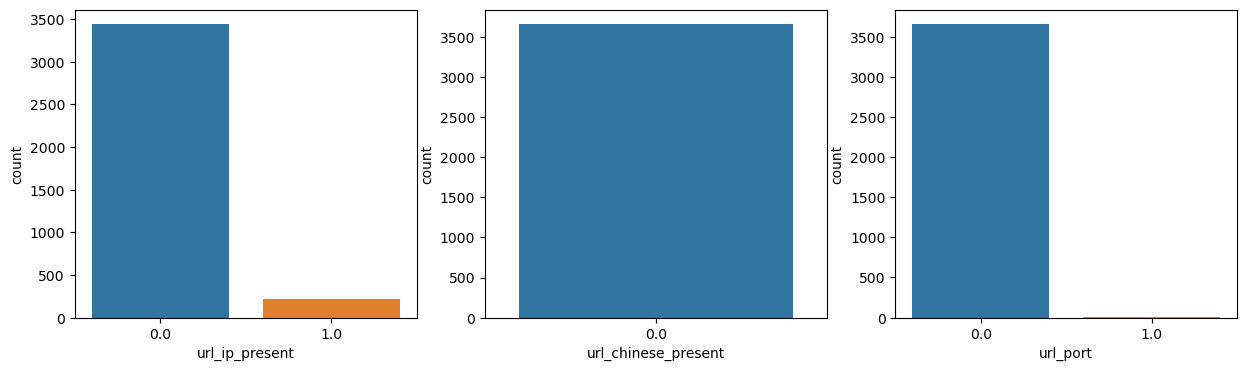

In [8]:
# 데이터 분석
# 범주형 변수 : url_ip_present, url_chinese_present, url_port
categorical_cols = ['url_ip_present', 'url_chinese_present', 'url_port']

plt.figure(figsize = (15,4))

# 범주형 변수 시각화
for i, cols in enumerate(categorical_cols) :
    plt.subplot(1,3,i+1)    
    sns.countplot(x = cols, data = train_data)
    
plt.show()

- url_chinese_present는 모두 0이므로 삭제

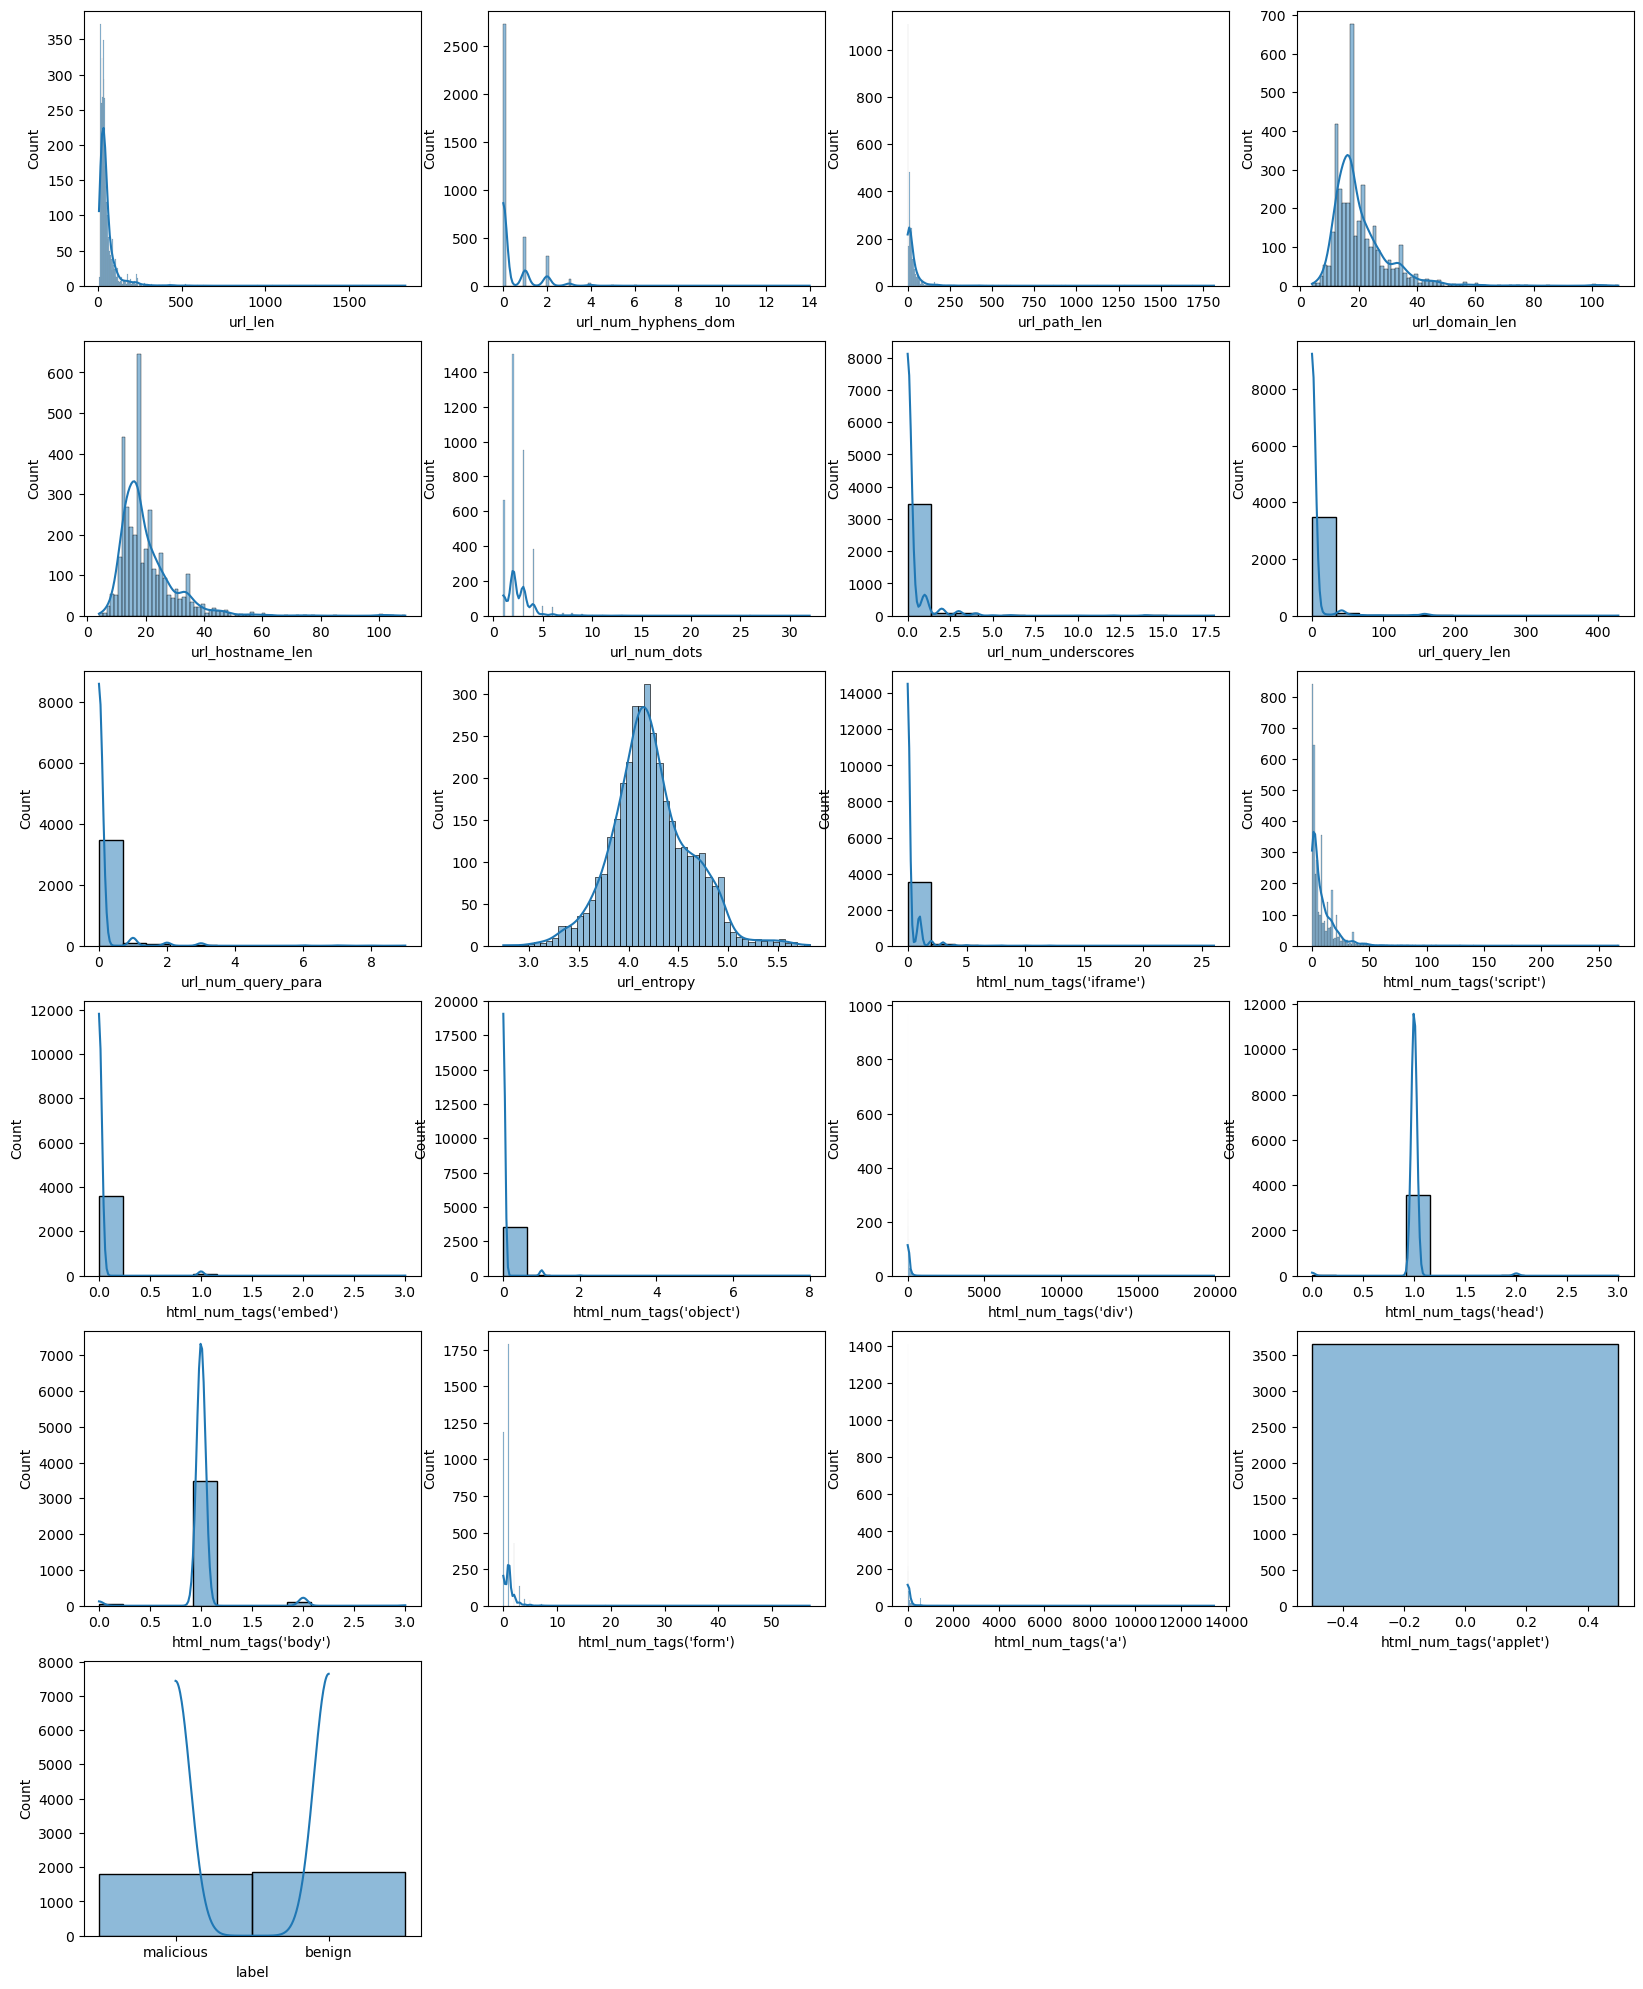

In [9]:
# 숫자형 변수 시각화
numberical_data = train_data.drop(categorical_cols, axis = 1)

plt.figure(figsize = (20,25))
for i, col in enumerate(list(numberical_data)) :
    plt.subplot(6,4,i+1)
    sns.histplot(x = col, kde = True, data = numberical_data)

plt.show()

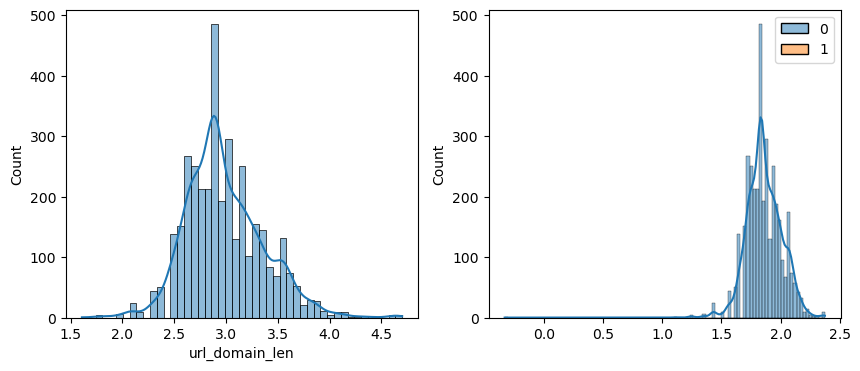

In [10]:
'''
데이터 편향이 보임
1. log 변환 -> np.log1p()
2. Box-cox transform -> stats.boxcox()
''' 
from scipy import stats

col = 'url_domain_len'
log_transform = np.log1p(numberical_data[col]) # 로그 변환
boxcox_transform = stats.boxcox(numberical_data[col])

plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
sns.histplot(log_transform, kde = True)
plt.subplot(1,2,2)
sns.histplot(boxcox_transform, kde = True)
plt.show()

- 편향된 데이터는 log변환으로 선택

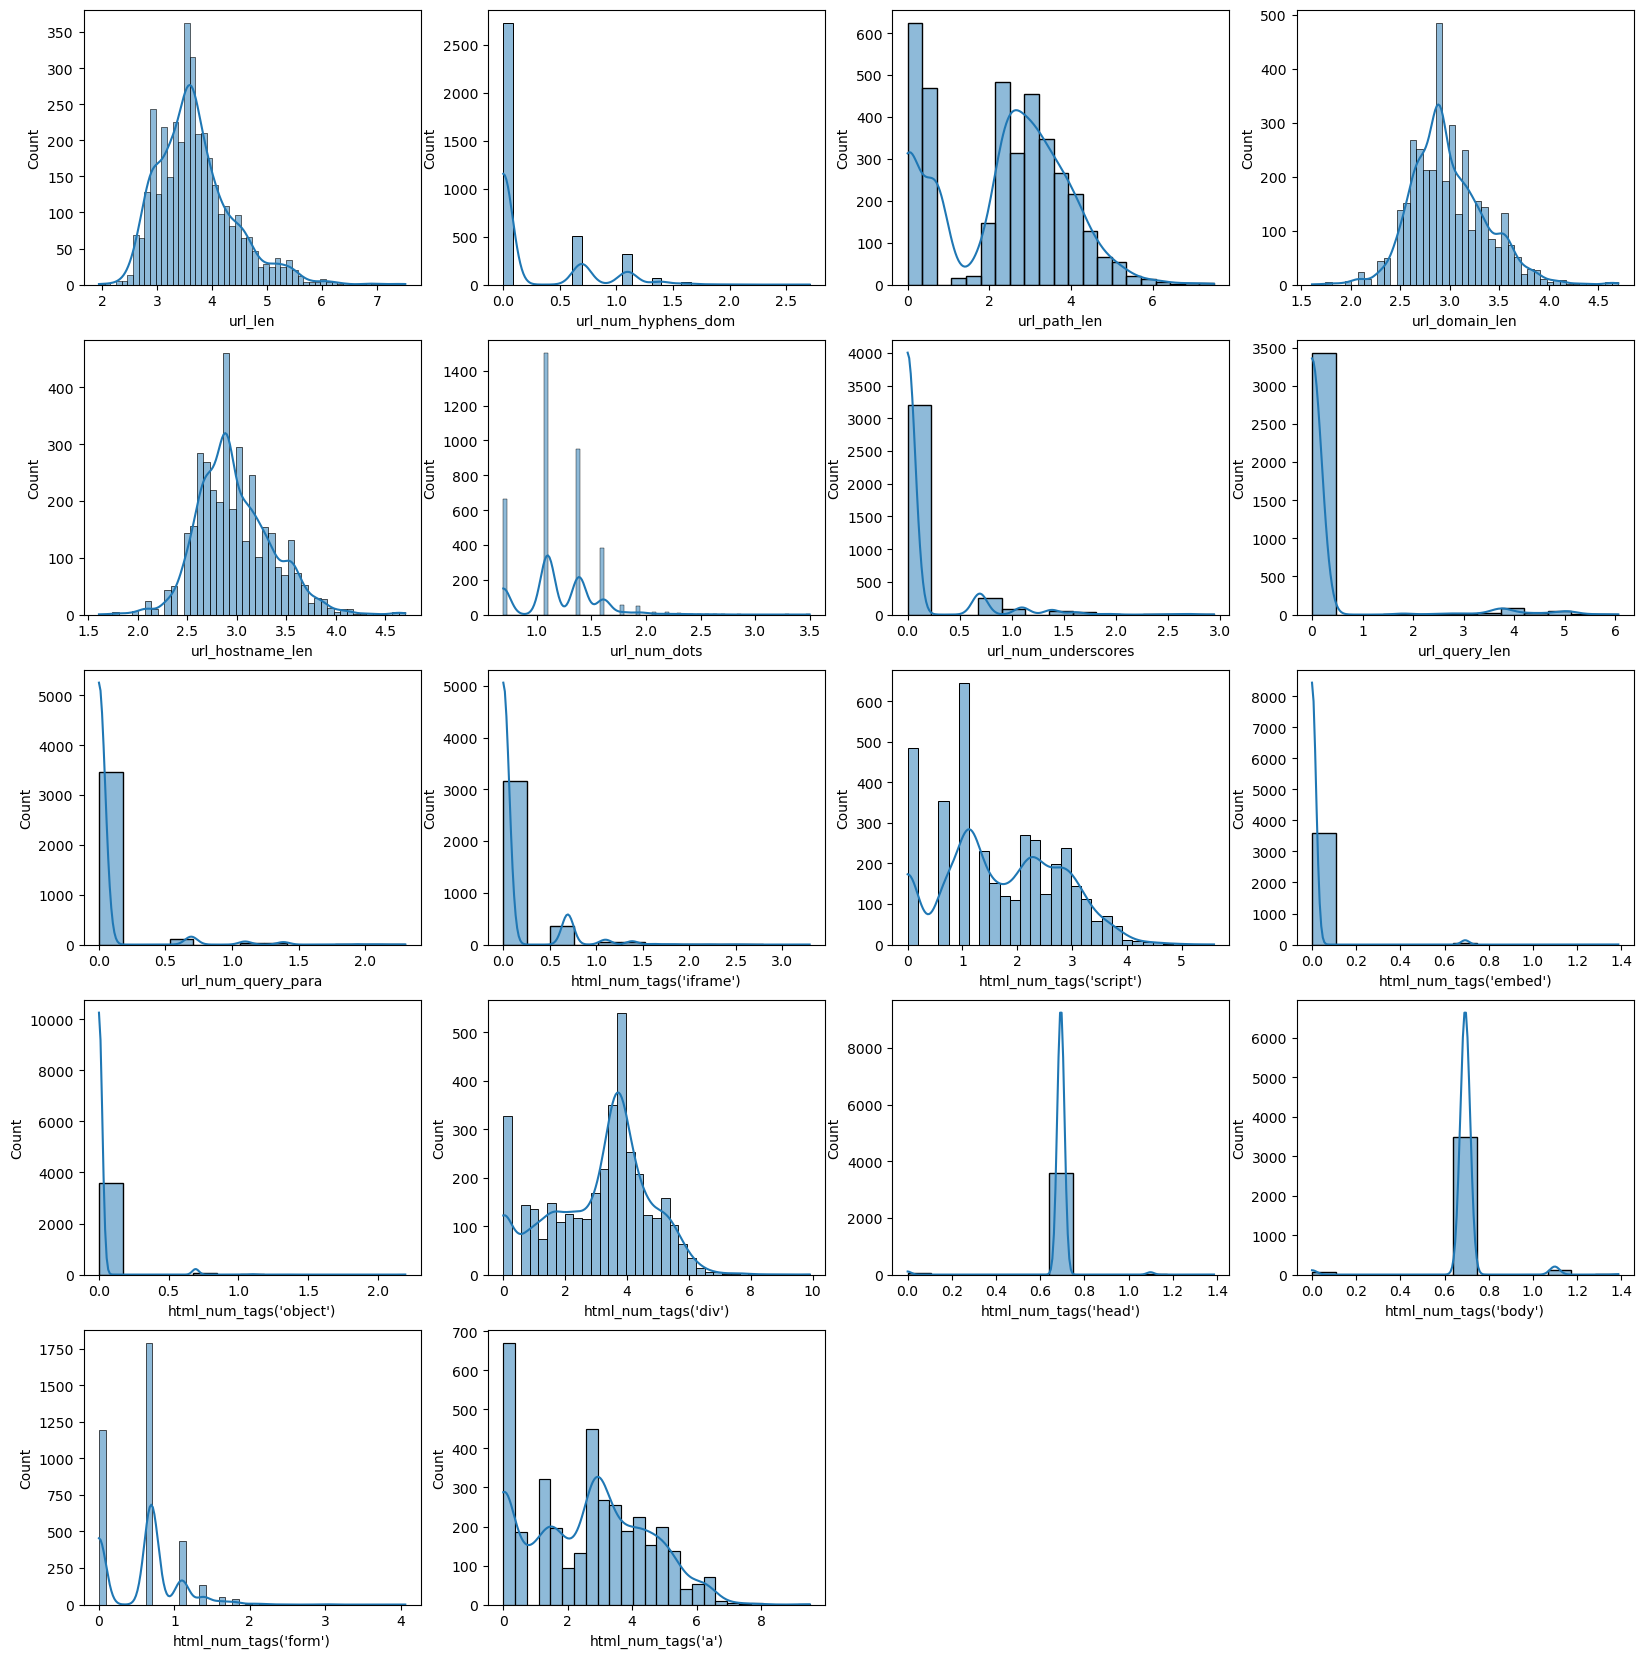

In [11]:
# log 변환전 제외할 열
except_cols = ['url_entropy','html_num_tags(\'applet\')', 'label']
log_transform_data = numberical_data.drop(except_cols, axis = 1)

for col in list(log_transform_data) :
    if col != except_cols :
        train_data[col] = np.log1p(log_transform_data[col])
        
# 변환후 histplot 그리기
plt.figure(figsize = (20,25))
for i, col in enumerate(list(log_transform_data)) :
    plt.subplot(6,4,i+1)
    sns.histplot(x = col, kde = True, data = train_data)

plt.show()

In [12]:
# vif(다중공선성) 식별
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

numberical_data = train_data.drop(categorical_cols, axis = 1) # 수치형만
numberical_data.drop('label', axis = 1, inplace=True) # label(타겟) 제외
cols = list(numberical_data)

scale = StandardScaler()
numberical_data = scale.fit_transform(numberical_data)

numberical_data = pd.DataFrame(numberical_data, columns= cols)

vif = pd.DataFrame()
vif['feature'] = list(numberical_data)
vif['vif'] = [variance_inflation_factor(numberical_data.values, i) for i in range(numberical_data.shape[1])]

vif

C:\Users\User\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,feature,vif
0,url_len,6.871501
1,url_num_hyphens_dom,1.680823
2,url_path_len,6.057925
3,url_domain_len,209.718510
4,url_hostname_len,208.939746
5,url_num_dots,1.310367
6,url_num_underscores,1.437997
7,url_query_len,6.723491
8,url_num_query_para,6.197160
9,url_entropy,2.485973


- 다중공선성결과 url_hostname_len과 NaN값인 html_num_tags('applet')을 제거

In [13]:
# 제거후 vif
numberical_data.drop(['url_hostname_len', 'html_num_tags(\'applet\')'], axis = 1, inplace = True)

vif = pd.DataFrame()
vif['feature'] = list(numberical_data)
vif['vif'] = [variance_inflation_factor(numberical_data.values, i) for i in range(numberical_data.shape[1])]

vif

,feature,vif
0,url_len,6.869182
1,url_num_hyphens_dom,1.679074
2,url_path_len,6.049717
3,url_domain_len,2.481096
4,url_num_dots,1.291864
5,url_num_underscores,1.437018
6,url_query_len,6.723418
7,url_num_query_para,6.196767
8,url_entropy,2.483403
9,html_num_tags('iframe'),1.165788


In [14]:
# trian_data와 test_data 다중공성성 데이터 제거
vif_drop_col = ['url_hostname_len', 'html_num_tags(\'applet\')']
train_data.drop(vif_drop_col, axis =1, inplace = True)
test_data.drop(vif_drop_col, axis =1, inplace = True)

In [15]:
train_data.shape, test_data.shape

((3662, 22), (2441, 21))

In [16]:
# test_data log 변환
except_cols = ['url_entropy']
numberical_data = test_data.drop(categorical_cols, axis = 1)
log_transform_data = numberical_data.drop(except_cols, axis = 1)

for col in list(log_transform_data) :
    if col != except_cols :
        test_data[col] = np.log1p(log_transform_data[col])

In [21]:
# label malicious -> 1 / benign -> 0
train_data.replace('malicious', 1, inplace=True)
train_data.replace('benign', 0, inplace=True)

In [23]:
# 상관계수 
import scipy.stats as spst
numberical_data = train_data.drop(categorical_cols, axis = 1)

for col in list(numberical_data) :
    print(f'{col} : '.ljust(30), spst.pearsonr(numberical_data[col], numberical_data['label']))

url_len :                      PearsonRResult(statistic=0.16378601382982733, pvalue=1.9517242626639194e-23)
url_num_hyphens_dom :          PearsonRResult(statistic=0.3849105464925334, pvalue=1.2386155093408469e-129)
url_path_len :                 PearsonRResult(statistic=0.05706138161196651, pvalue=0.0005509570488306498)
url_domain_len :               PearsonRResult(statistic=0.38750865565397546, pvalue=1.6423724759603062e-131)
url_num_dots :                 PearsonRResult(statistic=-0.12140771245023145, pvalue=1.684698296342592e-13)
url_num_underscores :          PearsonRResult(statistic=-0.176876788680623, pvalue=4.0485504004644536e-27)
url_query_len :                PearsonRResult(statistic=0.25359637478937336, pvalue=7.67191655995856e-55)
url_num_query_para :           PearsonRResult(statistic=0.22098881662727948, pvalue=9.568907253674643e-42)
url_entropy :                  PearsonRResult(statistic=0.16580800322160796, pvalue=5.5049054212466004e-24)
html_num_tags('iframe') :      P

- html_num_tags('head'), html_num_tags('body')가 타겟과 관계가 없기에 드랍

In [25]:
# 범주형 ttest_ind

for col in list(train_data[categorical_cols]) :
    malicious = train_data.loc[train_data['label'] == 1, col]
    benign = train_data.loc[train_data['label'] == 0, col]

    print(f'{col} : '.ljust(30), spst.ttest_ind(malicious, benign, equal_var = False))

url_ip_present :               Ttest_indResult(statistic=-4.8092605461587095, pvalue=1.5803560279399198e-06)
url_chinese_present :          Ttest_indResult(statistic=nan, pvalue=nan)
url_port :                     Ttest_indResult(statistic=-0.6713063685960766, pvalue=0.502069612764652)


- url_chinese_present, url_port 를 삭제

In [28]:
# 열 삭제 
drop_cols = ["html_num_tags('head')", "html_num_tags('body')", "url_chinese_present", "url_port"]

train_data.drop(drop_cols, axis = 1, inplace = True)
test_data.drop(drop_cols, axis = 1, inplace = True)

train_data.shape, test_data.shape

((3662, 18), (2441, 17))

In [29]:
# 입력과 타켓을 분리
target = 'label'
x = train_data.drop(target, axis = 1)
y = train_data[target]

In [33]:
# 훈련과 테스트 데이터 분리
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(x,y, random_state = 42, test_size= 0.2)

In [78]:
# !pip install catboost
# catboost로 학습

from catboost import CatBoostClassifier
cb = CatBoostClassifier(n_estimators = 500,
                        max_depth=5,
                        learning_rate=0.2,
                        loss_function='Logloss',
                        verbose=False)
cb.fit(train_input, train_target)

In [79]:
# 평가
from sklearn.metrics import f1_score

test_pred = cb.predict(test_input)
print(f1_score(test_target, test_pred))

0.9653179190751445
